In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
!pip install -q keras
import keras
from keras.datasets import mnist



In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

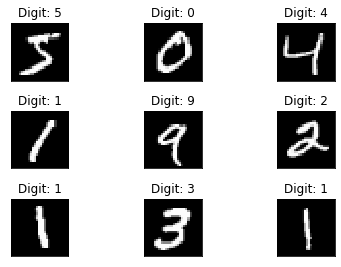

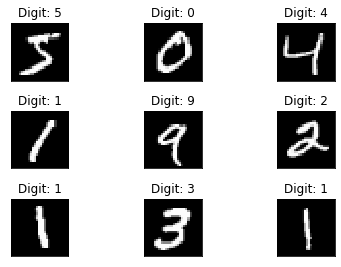

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

(60000, 28, 28)


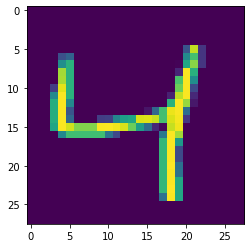

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test =X_test/ 255

In [9]:
X_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
from keras.layers import Activation
model = Sequential()

In [12]:
model.add(Convolution2D(128, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Convolution2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Convolution2D(512, (3, 3), activation = 'relu'))
model.add(Convolution2D(1024, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Convolution2D(1024, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
# model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 512)       1180160   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 1024)        4719616   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 1024)        0

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adamax',
             metrics=['accuracy'])

In [15]:
batch_size=128
num_epoch=10

In [ ]:
model=model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))
